In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("svm.csv")

In [3]:
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [4]:
df.isna()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_tr,y_tr)

SVC(kernel='linear', random_state=0)

In [15]:
y_pred = classifier.predict(x_te)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_te,y_pred)
acc=accuracy_score(y_te,y_pred)
print(cm)
print(acc)

[[57  1]
 [ 6 16]]
0.9125


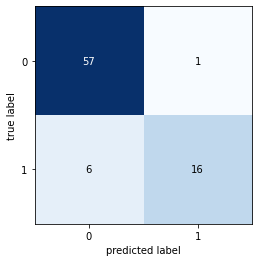

In [12]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

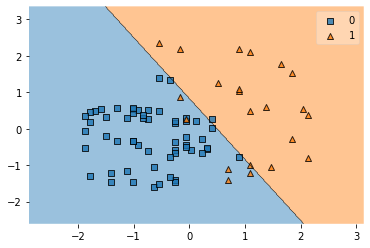

In [14]:
plot_decision_regions(X=x_te,y=y_te,clf=classifier)
plt.show()